In [1]:
# import sys
# sys.path.append('../data')
# print each command: 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# General DS libraries we are going to need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Importing our base model
# [REDACTED ML MODEL USED]

# Imports for working with our large dataset
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import train_test_split

# We need those for data manipulation and getting our features ready for the model
from sklearn.preprocessing import OneHotEncoder, Normalizer, Binarizer
from sklearn.compose import make_column_transformer

# These can be used to measure our model's performance
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Ignore DataFrame assignment warnings
pd.options.mode.chained_assignment = None

pd.options.display.float_format = '{:,.2f}'.format

data_path = './data/'

In [3]:
%%time
train_accounts = pd.read_csv(data_path + 'train_accounts.csv')
train_users = pd.read_csv(data_path + 'train_users.csv')
train_events = pd.read_csv(data_path + 'train_events.csv')
train_subscriptions = pd.read_csv(data_path + 'train_subscriptions.csv')
test_accounts = pd.read_csv(data_path + 'test_accounts.csv')
test_users = pd.read_csv(data_path + 'test_users.csv')
test_events = pd.read_csv(data_path + 'test_events.csv')
test_subscriptions = pd.read_csv(data_path + 'test_subscriptions.csv')

<string>:2: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 35.9 s


In [ ]:
accounts = pd.concat([train_accounts, test_accounts],sort=False)
users = pd.concat([train_users, test_users],sort=False)
events = pd.concat([train_events, test_events],sort=False)
subscriptions = pd.concat([train_subscriptions, test_subscriptions],sort=False)

Pseudo-prediction:

In [72]:
submission_account_ids = test_accounts.account_id.values
y_pred_submission = np.floor(np.random.random(size=len(submission_account_ids))+0.025)

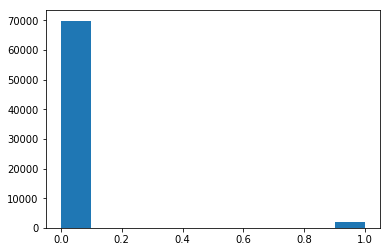

In [73]:
plt.hist(y_pred_submission)
plt.show();

In [74]:
np.unique(y_pred_submission)

array([0., 1.])

In [75]:
# Creating a dictionary where the keys are the account_ids
# and the values are your predictions
predictions = dict(zip([str(int(i)) for i in submission_account_ids], [int(i) for i in y_pred_submission]))

In [64]:
group_name = 'fRidaY'

In [77]:
# Importing stuff for http requests
from urllib import request
import json

# We validate first that we actually send all the test accounts expected to be sent
if y_pred_submission.shape[0] != 71683 or submission_account_ids.shape[0] != 71683:
  raise Exception("You have to send all of the accounts! Expected: (71683, 71683), Got: ({}, {})".format(y_pred_submission.shape[0], submission_account_ids.shape[0]))

if "group_name" not in vars() or group_name == "":
  group_name = input("Please enter your group's name:")

data = json.dumps({'submitter': group_name, 'predictions': predictions}).encode('utf-8')

req = request.Request("https://leaderboard.datahack.org.il/monday/api/",
                      headers={'Content-Type': 'application/json'},
                      method='POST',
                      data=data)

res = request.urlopen(req)
print(json.load(res))

{'member': 'fRidaY', 'rank': 4, 'score': 0.006284317039740354}


In [1]:
type(y_pred_submission)

NameError: name 'y_pred_submission' is not defined

In [ ]:
0.006284317039740354